### Import Python Packages

In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Connect to Database

In [26]:
# Connect to the SQLite database
conn = sqlite3.connect('bricks.db')

# Create a cursor object
cursor = conn.cursor()

List tables

In [9]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('themes',), ('colors',), ('part_categories',), ('parts',), ('part_relationships',), ('elements',), ('minifigs',), ('inventories',), ('sets',), ('inventory_parts',), ('inventory_sets',), ('inventory_minifigs',)]


Lego sets released by year

In [13]:
query = "SELECT * FROM sets;"
lego_sets = pd.read_sql_query(query, conn)

In [14]:
print(lego_sets.head())

  set_num                        name  year  theme_id  num_parts  \
0   001-1                       Gears  1965         1         43   
1  0011-2           Town Mini-Figures  1979        67         12   
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0   
3  0012-1          Space Mini-Figures  1979       143         12   
4  0013-1          Space Mini-Figures  1979       143         12   

                                             img_url  
0   https://cdn.rebrickable.com/media/sets/001-1.jpg  
1  https://cdn.rebrickable.com/media/sets/0011-2.jpg  
2  https://cdn.rebrickable.com/media/sets/0011-3.jpg  
3  https://cdn.rebrickable.com/media/sets/0012-1.jpg  
4  https://cdn.rebrickable.com/media/sets/0013-1.jpg  


In [15]:
sets_per_year = lego_sets['year'].value_counts().sort_index()
print(sets_per_year)

year
1949       5
1950       6
1953       4
1954      14
1955      39
        ... 
2019    1002
2020    1011
2021    1137
2022     971
2023     522
Name: count, Length: 73, dtype: int64


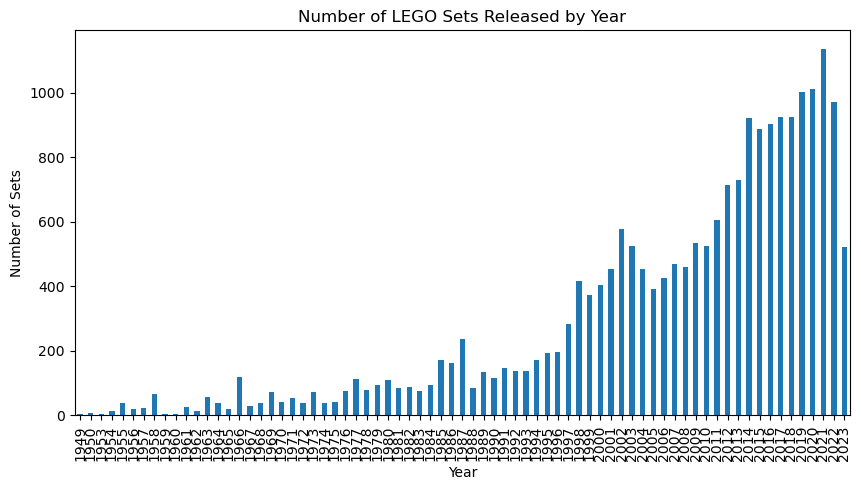

In [17]:
plt.figure(figsize=(10, 5))
sets_per_year.plot(kind='bar')
plt.title('Number of LEGO Sets Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.xticks(rotation=90)
plt.show()

Which set contains the most parts?

In [23]:
query = """
SELECT name, set_num, num_parts
FROM sets
ORDER BY num_parts DESC
LIMIT 1;
"""

cursor.execute(query)
result = cursor.fetchone()

if result:
    name, set_num, num_parts = result
    print(f"The LEGO set with the most parts is: {name} (Set ID: {set_num}, Parts: {num_parts})")
else:
    print("No LEGO sets found.")

The LEGO set with the most parts is: World Map (Set ID: 31203-1, Parts: 11695)


Top 10 most popular themes

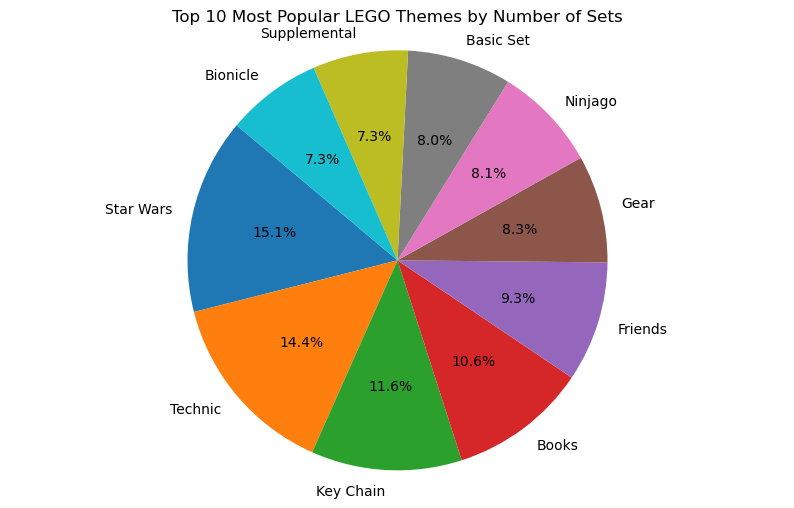

In [27]:
# SQL query to find the top 10 most popular LEGO themes based on the number of sets
query = """
SELECT lt.name, count(ls.set_num) as set_count
FROM themes lt
LEFT JOIN sets ls on lt.id = ls.theme_id
GROUP by lt.name
ORDER by set_count DESC
LIMIT 10;
"""

cursor.execute(query)
results = cursor.fetchall()


if results:
    theme_names = [row[0] for row in results]
    set_counts = [row[1] for row in results]

    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(set_counts, labels=theme_names, autopct='%1.1f%%', startangle=140)
    plt.title('Top 10 Most Popular LEGO Themes by Number of Sets')
    plt.axis('equal')
    plt.show()
else:
    print("No LEGO themes found.")


close the connection

In [24]:
conn.close()